In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Exercise 1

__TODO1__ (0.25) You are being given some data that have been generated from a 2-dimensional Gaussian (see file `sample.csv`). There is a numpy function `loadtxt`that can read your sample file and convert it to a numpy array. Write some code that reads and plots the data. 

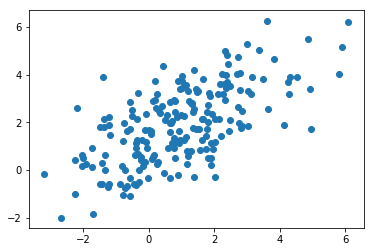

In [2]:
sample = numpy.loadtxt(open("sample.csv", "rb"))
x = sample[:,0].T
y = sample[:,1].T

fig, ax = plt.subplots()
ax.scatter(x, y)

## Estimation of the mean

__TODO2__ (0.5 pt) First write code to estimate the mean vector and represent the mean (as a green dot) in your plot. Do not use any built-in function for the mean, but implement the formula that was given to you during the hoorcollege. 

[[0.93690526]
 [1.91427756]]


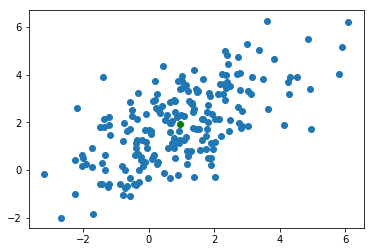

In [3]:
def est_mean(X):
    # Returns 2D array for mean instead of 1D for the np transpose functionality 
    return np.array([np.sum(X,axis=0)/len(X)]).T

mean = est_mean(sample)
print(mean)

ax.scatter(mean[0][0], mean[1][0], color='green')
fig

## Estimation of the covariance matrix

__TODO3__ (0.5 pt) Next write some code returning an estimate of the covariance matrix. Again do not use any built-in function for the covariance matrix.

In [4]:
def cov(x, y, x_m, y_m):
    return (np.sum((x - x_m)*(y - y_m)))/(len(x) - 1)

def cov_mat(X, mean):
    return np.array([[cov(X[0], X[0], mean[0][0], mean[1][0]), 
                      cov(X[0], X[1], mean[0][0], mean[1][0])], 
                     [cov(X[1], X[0], mean[1][0], mean[0][0]), 
                      cov(X[1], X[1], mean[1][0], mean[0][0])]])

cova = cov_mat(sample.T, mean) 
print(cova)

[[2.9560786  1.76091589]
 [1.76091589 2.54304892]]


__TODO4__ (0.25 pt) Now compute an estimate of the covariance matrix using the built-in function `np.cov` and compare with your previous answer. 

In [5]:
print(np.cov(sample.T))

# The covariance matrix from my function and from the built in function np.cov are the same

[[2.9560786  1.76091589]
 [1.76091589 2.54304892]]


Using the estimators of the mean and covariance matrix, we have now an estimate of a Gaussian distribution $\mathcal{N}([x,y] | \mu, \Sigma)$ that we will represent on our plot. The graph of $\mathcal{N}([x,y] | \mu, \Sigma)$ is a 3-dimensional graph (one dimension for $x$, one dimension for $y$ and one dimension for $\mathcal{N}([x,y] | \mu, \Sigma)$). One way to represent such a 3-dimensional graph in 2 dimensions is to draw contour lines (in the same way that we have contour lines to represent the altitude on a geographical map). 

__TODO5__ (0.25 pt) Define a function `gaussian(x,y,mu,cova)` that takes `(x,y,mu,cova)` as parameters and returns the value of $\mathcal{N}([x,y] | \mu, \Sigma)$ at the point $(x,y)$ with mean `mu` and covariance matrix `cova`. Do not use any built-in functions for computing a multivariate Gaussian; however, tou can use the determinant and trace functions from `numpy`.

In [15]:
def gaussian(x,y,mu,cova):
    xy_vec = np.array([[x],[y]])
    a = abs(np.linalg.det(2*np.pi*cova))
    b = -0.5*(xy_vec-mu).T
    c = np.matmul(np.linalg.inv(cova),(xy_vec-mu))
    d = np.matmul(b,c)
    gauss = np.power(a,-0.5)*np.exp(np.asscalar(d))
    return gauss
    
# Test with first data point
print(gaussian(sample[0][0],sample[1][1],mean,cova))

# Check with built in function if correct
from scipy.stats import multivariate_normal
print(multivariate_normal.pdf(np.array([sample[0][0], sample[1][1]]), mean[:,0], cova))

0.0358588399551422
0.03585883995514219


Now we will draw the contour lines. You can see some examples [here](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour). The steps are as follows:

(1) we generate two matrices `X` and `Y` of $x$ and $y$ coordinates. 

(2) we calculate in a vector `Z` all the images $\mathcal{N}([x,y] | \mu, \Sigma)$ of the points generated in the first step. 

(3) we apply the function `plt.contour` to the vector $Z$

For step (1), first generate a vector `x0`, using the function `np.linspace`, which consists of 200 points uniformly distributed between $-8$ and $8$. Similarly, we generate `y0` and combine `x0` and `y0` using `np.meshgrid` to produce the matrices `X` and `Y`. 

In [7]:
#given to the students

x0 = np.linspace(-8, 8, 200)
y0 = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x0, y0)

__TODO6__ (0.75 pt) In order to show your understanding of the above example, write code (similar to the previous one, except using different values as input for `np.linspace`) using the `np.linspace` and `np.meshgrid` functions that generate the below matrices `X1` and `Y1` given respectively by
$$X_1 = \begin{bmatrix} -4 & -2 & 0 & 2 & 4 \\
-4 & -2 & 0 & 2 & 4 \end{bmatrix}$$

and
$$Y_1 = \begin{bmatrix} -6 & -6 & -6 & -6 & -6 \\
6 & 6 & 6 & 6 & 6 \end{bmatrix}.$$

You can use the previous code and play around with the values $-8, 8, 200$ and $100$ and see what happens.

In [8]:
x1 = np.linspace(-4, 4, 5)
y1 = np.linspace(-6, 6, 2)
X1, Y1 = np.meshgrid(x1, y1)
print(X1)
print(Y1)

[[-4. -2.  0.  2.  4.]
 [-4. -2.  0.  2.  4.]]
[[-6. -6. -6. -6. -6.]
 [ 6.  6.  6.  6.  6.]]


__TODO7__ (0.5 pt) For steps (2) and (3), we use the functions `np.vectorize` (applied to the function $\mathcal{N}([x,y] | \mu, \Sigma)$) and the `plt.contour` function. Note that when you use the function `np.vectorize`, you will have to use the optional argument `'excluded'`, as only the first two argument of $\mathcal{N}([x,y] | \mu, \Sigma)$ are vectors.  You can now write the program that uses the matrices `X` and `Y` (as computed above) and the function created by `np.vectorize` to compute the vector `Z` and to draw the contour lines on the plot. 

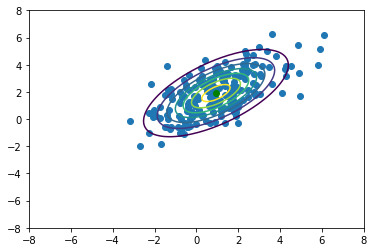

In [9]:
# Vectorize the gaussian function
vectorized_gaussian = np.vectorize(gaussian, excluded={'mu', 'cova'})

# Calculate vector Z with all the gaussian images of X and Y points
Z = vectorized_gaussian(X, Y, mu=mean, cova=cova)

# Draw contour lines on plot
ax.contour(X, Y, Z)
fig

## Computing the eigenvalues and eigenvectors 

__TODO8__ (1 pt) Now calculate the eigenvalues and eigenvectors of the covariance matrix. Here you can use built-in functions from `numpy`. Also check that the two eigenvectors are indeed perpendicular (that is, their dot product is zero). 

In [10]:
# Calculate eigenvalues and eigenvectors with np.linalg.eig
# Each eigenvector is column
eigenvalues, eigenvectors = np.linalg.eig(cova)
print(eigenvectors)

# Check that the eigenvectors are perpendicular; they are
print(np.dot(eigenvectors[:,0], eigenvectors[:,1]))

[[ 0.74715416 -0.66465079]
 [ 0.66465079  0.74715416]]
0.0


__TODO9__ (1 pt) We now draw a graphical representation of the eigenvectors. Use the previous graph (with the data, the mean 1and the contour lines) and add the eigenvectors (using the mean as the origin of the vectors). Remember to use `plt.axis('square')` to scale your axes correctly.

One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most. Does your graphic validate this explanation?

Do the two vectors look perpendicular? Why not? 

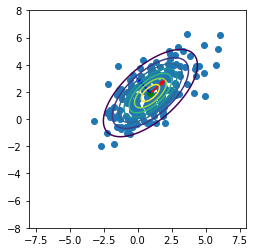

In [11]:
vectors = np.array([eigenvectors[:,0],eigenvectors[:,1]])
origin = [mean[0][0]], [mean[1][0]]
ax.quiver(*origin, vectors[:,0], vectors[:,1], color=['r','b'], scale=10) # Scale for evaluation in plot
ax.axis('square')
fig

# The eigenvectors are indeed the directions in which the data varies the most: they tell something about
# the shape of the data (and the elipse in this plot) and the eigenvectors are the of course 'principal 
# components' of the data (see PCA).

# To me, the vectors look perpendicular to each other. 

# Exercise 2

We will now again estimate the mean, covariance matrix and eigenvectors but from a data sample that you will generate yourself from a given Gaussian distribution. 

The data from Exercise 1 were sampled from a a 2-dimensional gaussian distribution with mean
$
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$
and covariance matrix $
\begin{bmatrix}
2 & 3 \\
3 & 2
\end{bmatrix}
$

__TODO10__ (2 pt) Write now a program that draws 200 samples from that same distribution and plot those samples on the plot from Exercise 1 (in a different color than the one used for the data from Exercise 1). Search for a built-in function that can generate multivariate gaussian samples. 

Using the code from Exercise 1, estimate the mean, the covariance matrix, the eigenvectors and draw the contour lines for that new sample. Do those differ much from the estimators that we found in Exercise 1?

/home/martine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


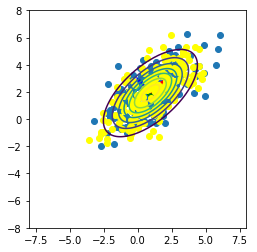

In [12]:
mean_data = np.array([1, 2])
cova_data = np.array([[2, 3],[3, 2]])
# Draw 200 samples from normal distribution 
data = np.random.multivariate_normal(mean_data, cova_data, 200).T

# Plot data on previous axe
ax.scatter(data[0,:], data[1,:], color='yellow')
fig

[[1.04685298]
 [1.89827971]]
[[3.16636089 2.00343967]
 [2.00343967 2.7437402 ]]
[[ 0.74326709 -0.66899479]
 [ 0.66899479  0.74326709]]


(-8.0, 8.0, -8.0, 8.0)

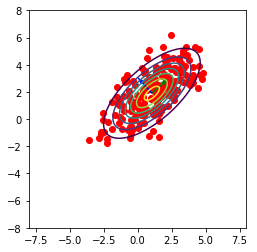

In [13]:
# Initialize new plot and plot data again along with contour lines
fig2, ax2 = plt.subplots()
ax2.scatter(data[0,:], data[1,:], color='red')
est_mean_data = est_mean(data.T) # Estimate mean
print(est_mean_data)
est_cova_data = cov_mat(data,est_mean_data) # Estimate covariance matrix
print(est_cova_data)
data_eigvalues, data_eigvect = np.linalg.eig(est_cova_data) # Eigenvectors
print(data_eigvect)
vectors = np.array([data_eigvect[:,0],data_eigvect[:,1]])
origin = [est_mean_data[0][0]], [est_mean_data[1][0]]
ax2.quiver(*origin, vectors[:,0], vectors[:,1], color=['g','b'], scale=10)
data_Z = vectorized_gaussian(X, Y, mu=est_mean_data, cova=est_cova_data) 
ax2.contour(X, Y, data_Z) # Draw contour lines
ax2.axis('square')

# The estimators do not differ much from the estimators found in exercise 1; the mean and covariance matrix are 
# only slightly different (the differences are often much smaller than one tenths). The eigenvectors and the contour
# plot are also quite similar.

# Exercise 3

We will do the same steps (estimation of mean, covariance matrix, eigenvectors) but from a sample of data that is not necessarily generated from a Gaussian distribution. The sample can be found in the file `sample2.csv`.

__TODO11__ (3 pt) Use the code you wrote in Exercise 1 to estimate the mean, the covariance matrix, the eigenvectors, and the eigenvalues. Finally give a graphical representation of the data, the mean and the eigenvectors (as in Exercise 1).

Is this model a good fit for the data that have been given to you? Give a few words of explanation and justify why by simply looking graphically at the data, we could expect (or not) the gaussian model to be an adequate model.

[[2.0101857 ]
 [3.26699795]]
[[1.68021749 0.74997338]
 [0.74997338 1.47588889]]
[[ 0.75331842 -0.65765596]
 [ 0.65765596  0.75331842]]


(-8.0, 8.0, -8.0, 8.0)

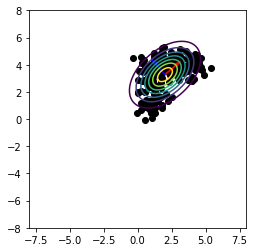

In [14]:
sample2 = numpy.loadtxt(open("sample2.csv", "rb"))
sample2_x = sample2[:,0].T
sample2_y = sample2[:,1].T

# Initialize new plot and plot data again along with contour lines
fig3, ax3 = plt.subplots()
ax3.scatter(sample2_x, sample2_y, color='black')
sample2_mean = est_mean(sample2) # Estimate mean
print(sample2_mean)
sample2_cova = cov_mat(sample2.T,sample2_mean) # Estimate covariance matrix
print(sample2_cova)
sample2_eigvalues, sample2_eigvect = np.linalg.eig(sample2_cova) # Eigenvectors
print(sample2_eigvect)
vectors = np.array([sample2_eigvect[:,0], sample2_eigvect[:,1]])
origin = [sample2_mean[0][0]], [sample2_mean[1][0]]
ax3.quiver(*origin, vectors[:,0], vectors[:,1], color=['r','b'], scale=10) 
sample2_Z = vectorized_gaussian(X, Y, mu=sample2_mean, cova=sample2_cova) 
ax3.contour(X, Y, sample2_Z) # Draw contour lines
ax3.axis('square')

# The Gaussian seems not like an accurate model for this data; if the gaussian would be a good fit the data
# would be in the shape of an elipse (or a circle of course). The reason for this is that a normal distribution
# has a lot of data centered around the 'peak' just like in the univariate gaussian distribution and the further 
# away the amount of data gradually becomes less. In conclusion, the shape of the plotted data from sample2.csv 
# does not indicate that the Gaussian would be a particularly good fit. See the plot below.